In [1]:
%load_ext autoreload
%autoreload 2
from DarkMatter import *
from scipy.interpolate import interp1d

Welcome to JupyROOT 6.26/08


## VERITAS ULs

In [4]:
plt.style.use("default")

In [5]:
chan = ["ee", "uu", "tt", "ttbar", "bbar", "WW", "ZZ", "gamma", "nue"]
chan_lab = [r"$e^{+}e^{-}$", r"$\mu^{+}\mu^{-}$", r"$\tau^{+}\tau^{-}$",
            r"$t\bar{t}$", r"$b\bar{b}$",
            r"$W^{+}W^{-}$", r"$Z^{+}Z^{-}$", r"$\gamma\gamma$", r"$\nu \bar{\nu}_e$"]

ls = ["-", "-", "-", "--", "--", ":",":", "-.", "-."]

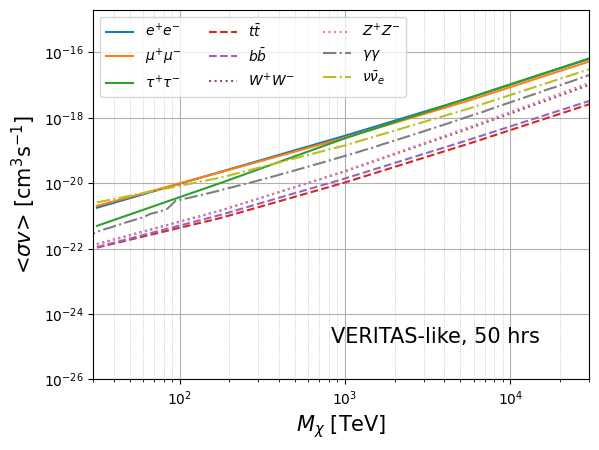

In [58]:
for c, cl, l in zip(chan, chan_lab, ls):
    if c == "gamma":
        filename = "vts_like_"+c+"_new"
    else:
        filename = "vts_like_"+c
    Likelihood.plotExpULcurve(filename=filename, label=cl, units="TeV", ls=l, mean_only=True, export=True)
plt.legend(loc=2, ncol=3)

ax = plt.gca()
plt.text(0.9, 0.1, "VERITAS-like, 50 hrs", fontsize=15, ha="right", transform=ax.transAxes)
#plt.text(0.9, 0.2, "95% upper limits", fontsize=15, ha="right", transform=ax.transAxes)
plt.xlabel(r"$M_{\chi}$ [TeV]", fontsize=15)
plt.ylim(1e-26, 2e-15)
plt.xlim(30, 3e4)
plt.savefig("VERITAS_ULs.pdf")

## Stat error

Text(0.5, 0, '$M_{\\chi}$ [TeV]')

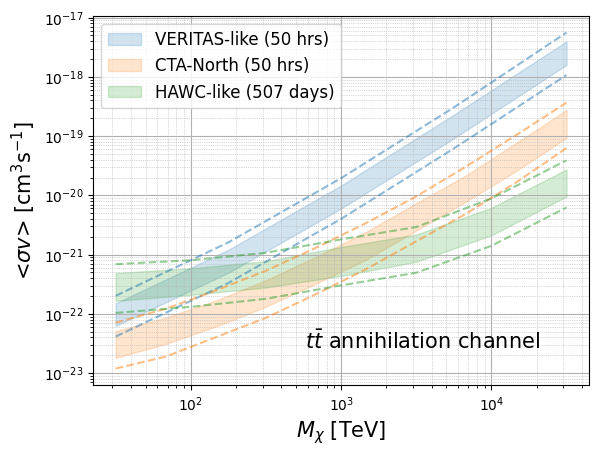

In [59]:
Likelihood.plotExpULcurve(filename="vts_like_ttbar_sys", label="VERITAS-like (50 hrs)", which = [68, 95], units="TeV", export=True)
Likelihood.plotExpULcurve(filename="CTA_like_ttbar_sys", label="CTA-North (50 hrs)", which = [68, 95], units="TeV", export=True)
Likelihood.plotExpULcurve(filename="hawc_like_ttbar_sys", label="HAWC-like (507 days)", which = [68, 95], units="TeV", export=True)

plt.legend(loc=2, fontsize=12)
ax = plt.gca()
plt.text(0.9, 0.1, r"$t\bar{t}$ annihilation channel", fontsize=15, ha="right", transform=ax.transAxes)
plt.xlabel(r"$M_{\chi}$ [TeV]", fontsize=15)
#plt.savefig("stat_err.pdf")

## Sys error

Text(0.5, 0, '$M_{\\chi}$ [TeV]')

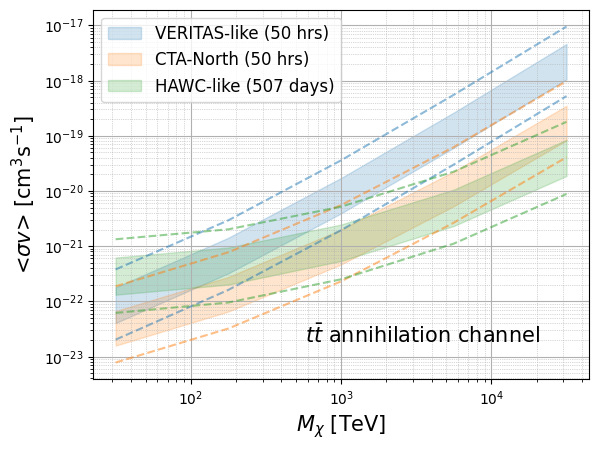

In [60]:
Likelihood.plotExpULcurve(filename="vts_like_ttbar_jsys", label="VERITAS-like (50 hrs)", which = [68, 95], units="TeV", export=True)
Likelihood.plotExpULcurve(filename="CTA_like_ttbar_jsys", label="CTA-North (50 hrs)", which = [68, 95], units="TeV", export=True)
Likelihood.plotExpULcurve(filename="hawc_like_ttbar_jsys", label="HAWC-like (507 days)", which = [68, 95], units="TeV", export=True)

plt.legend(loc=2, fontsize=12)
ax = plt.gca()
plt.text(0.9, 0.1, r"$t\bar{t}$ annihilation channel", fontsize=15, ha="right", transform=ax.transAxes)
plt.xlabel(r"$M_{\chi}$ [TeV]", fontsize=15)
#plt.savefig("sys_err.pdf")

No handles with labels found to put in legend.


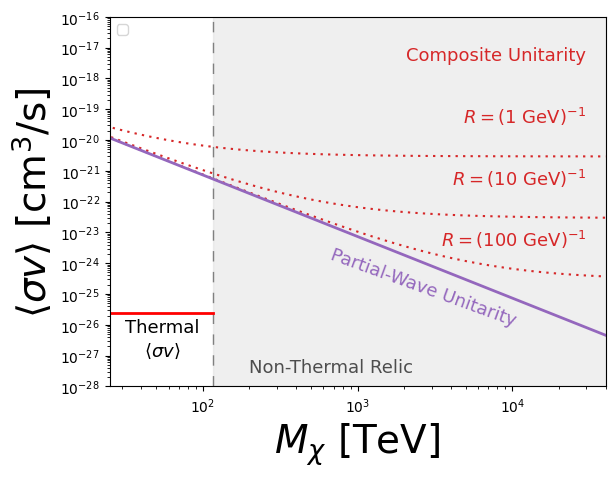

In [6]:
vrel = 2.e-5
TeV2cm3s = 1.1673299710900705e-23

### s-wave Unitarity limit ###
# This is equation (10) of [Griest, Kamionkowski 1990], with J=0 for s-wave
def slim(m):
    "m [TeV]"
    return TeV2cm3s*(4.*np.pi)/(m**2.*vrel)

# Add in the finite size, which is (5) in https://arxiv.org/pdf/2203.06029.pdf, or (16) in Kamionkowski and Griest (but they expand in the last step)

### Composite Unitarity limit ###
# This is equation (16) of [Griest, Kamionkowski 1990], but without the approximation that Jmax >> 1 as they use in the final step
def Rlim(m, Rinv):
    "m [TeV], Rinv [TeV]"
    R = 1./Rinv
    return TeV2cm3s*(4.*np.pi)/(m**2.*vrel)*(1.+m*vrel*R)**2.

#rescale=1.1
#plot_h = 10/rescale
#plot_w = 8/rescale
fig, ax = plt.subplots(1)

plt.xlabel(r'$M_{\chi}$ [TeV]',fontsize=28)
plt.ylabel(r'$\langle \sigma v \rangle$ [cm$^3$/s]',fontsize=28)

mpl.rcParams['lines.dashed_pattern'] = 7.5, 7.5
plt.axvline(117.,ls='--',c='gray',lw=1.)
plt.fill_between([116.11,4.e4],[1.e-28,1.e-28],[1.e-16,1.e-16],color=(0.8,0.8,0.8),alpha=0.3)

plt.plot([10.,116.11],[2.4e-26,2.4e-26],c='red',lw=2.)

mpl.rcParams['lines.dotted_pattern'] = 1.1, 2.5
mv=np.logspace(1.,np.log10(4.e4),100)
cv="#d62728"
plt.plot(mv,Rlim(mv,1.e-3),ls=':',c=cv,lw=1.5,zorder=2)
plt.plot(mv,Rlim(mv,1.e-2),ls=':',c=cv,lw=1.5,zorder=2)
plt.plot(mv,Rlim(mv,1.e-1),ls=':',c=cv,lw=1.5,zorder=2)
plt.plot([10.,4.e4],[slim(10.),slim(4.e4)],c='#9467bd',lw=2.,zorder=2)

plt.xscale('log')
plt.yscale('log')
plt.xlim([10.,4.e4])
#plt.ylim([1.e-28,1.e-17])

# Restore y ticks
locmaj = mpl.ticker.LogLocator(base=10, numticks=1000)
ax.yaxis.set_major_locator(locmaj)

locmin = mpl.ticker.LogLocator(base=10.0, subs=np.linspace(0, 1.0, 11)[1:-1], numticks=1000)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())

# Text
#plt.text(1.15e1,1.5e-18,r'Unitarity Limits',fontsize=13)

plt.text(55,6.e-27,r'Thermal',fontsize=13, ha="center")
plt.text(55,1.e-27,r'$\langle \sigma v \rangle$',fontsize=13, ha="center")
 
plt.text(200,3.e-28,r'Non-Thermal Relic',fontsize=13,color=(0.3,0.3,0.3))
plt.text(1.1e4, 1e-26,r'Partial-Wave Unitarity',fontsize=13,color='#9467bd',rotation=340, ha="right")
plt.text(3e4,4e-18,r'Composite Unitarity',fontsize=13,color=cv, ha="right")

plt.text(3e4,3.5e-20,r'$R=(1~{\rm GeV})^{-1}$',fontsize=13,color=cv, ha="right")
plt.text(3e4,3.5e-22,r'$R=(10~{\rm GeV})^{-1}$',fontsize=13,color=cv, ha="right")
plt.text(3e4,3.5e-24,r'$R=(100~{\rm GeV})^{-1}$',fontsize=13,color=cv, ha="right")

#plt.tight_layout()
#plt.legend()
#plt.xlabel(r'$M_{\chi}$ [TeV]',fontsize=15)
plt.xlim(25, )
plt.ylim(1e-28, 1e-16)
plt.legend(loc=2, fontsize=10)
plt.show()

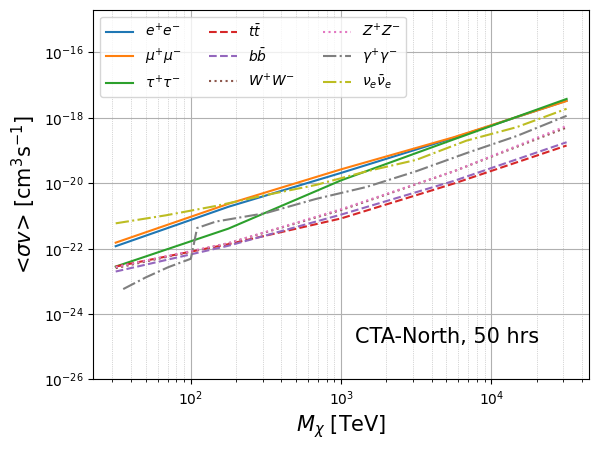

In [72]:
for c, cl, l in zip(chan, chan_lab, ls):
    
    if c == "gamma":
        filename = "cta_like_"+c+"_new"
    else:
        filename = "cta_like_"+c
    Likelihood.plotExpULcurve(filename=filename, label=cl, units="TeV", ls=l, mean_only=True, export=True)
plt.legend(loc=2, ncol=3)

ax = plt.gca()
plt.text(0.9, 0.1, "CTA-North, 50 hrs", fontsize=15, ha="right", transform=ax.transAxes)
#plt.text(0.9, 0.2, "95% upper limits", fontsize=15, ha="right", transform=ax.transAxes)
plt.xlabel(r"$M_{\chi}$ [TeV]", fontsize=15)
plt.ylim(1e-26, 2e-15)
plt.savefig("CTA_ULs.pdf")

In [11]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

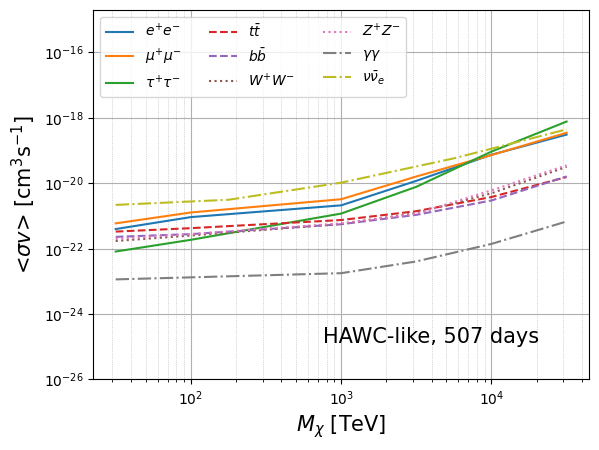

In [62]:
for c, cl, l in zip(chan, chan_lab, ls):
    if c == "nue":
        filename = "hawc_like_"+c
    else:
        filename = "hawc_like_"+c+"_v2"
    Likelihood.plotExpULcurve(filename=filename, label=cl, units="TeV", ls=l, mean_only=True, export=True)
plt.legend(loc=2, ncol=3)

ax = plt.gca()
plt.text(0.9, 0.1, "HAWC-like, 507 days", fontsize=15, ha="right", transform=ax.transAxes)
#plt.text(0.9, 0.2, "95% upper limits", fontsize=15, ha="right", transform=ax.transAxes)
plt.xlabel(r"$M_{\chi}$ [TeV]", fontsize=15)
plt.ylim(1e-26, 2e-15)
#plt.legend(fontsize=13, loc=2, ncol=2)
plt.savefig("HAWC_ULs.pdf")

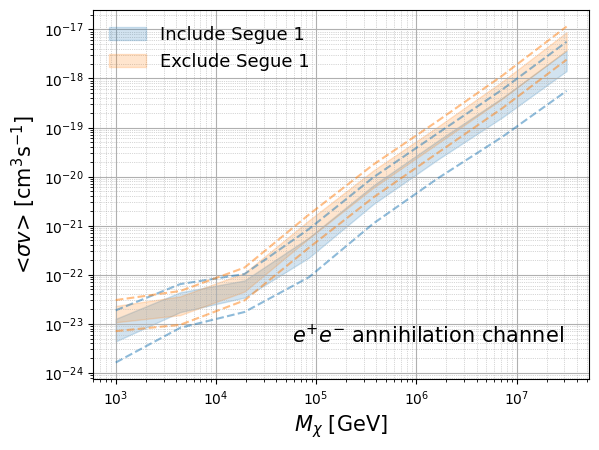

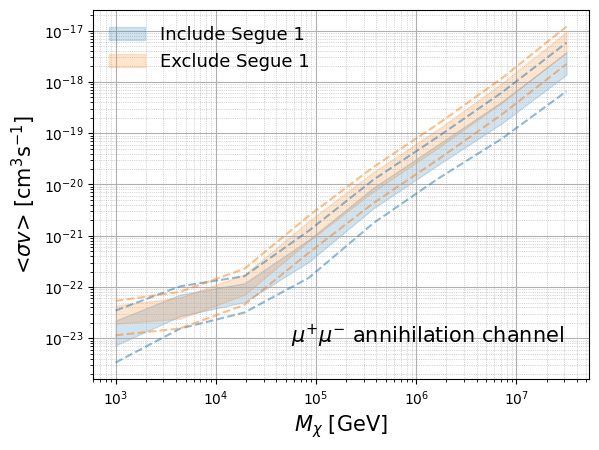

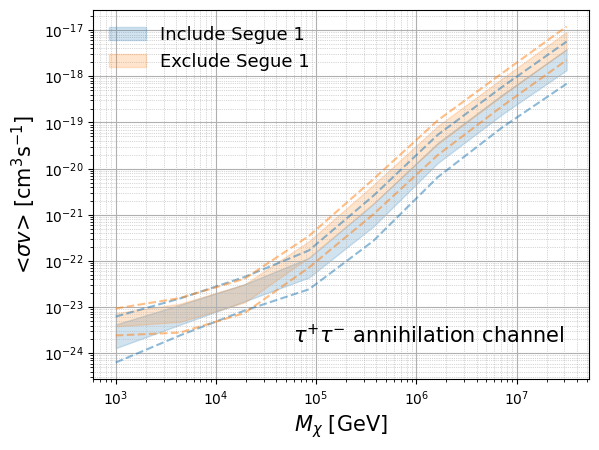

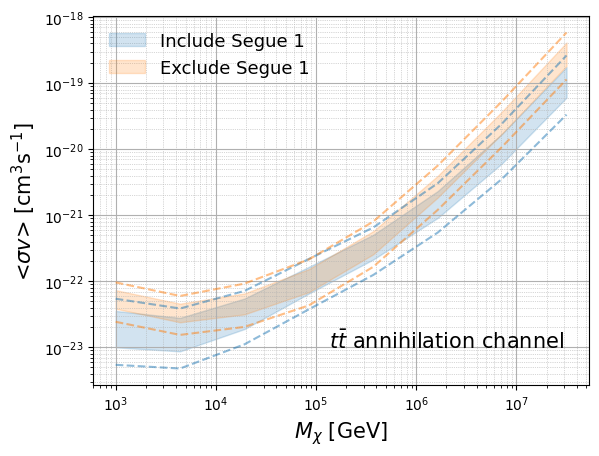

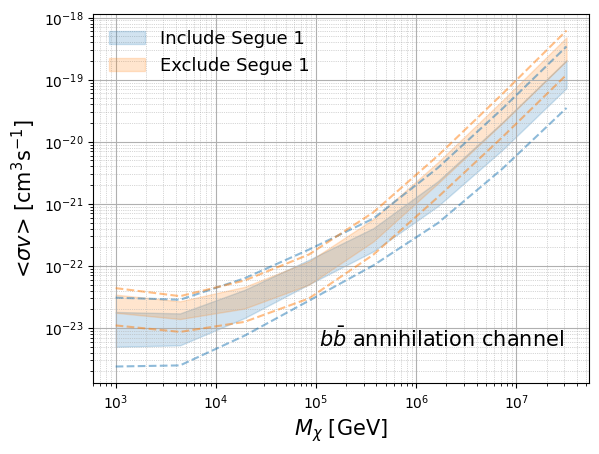

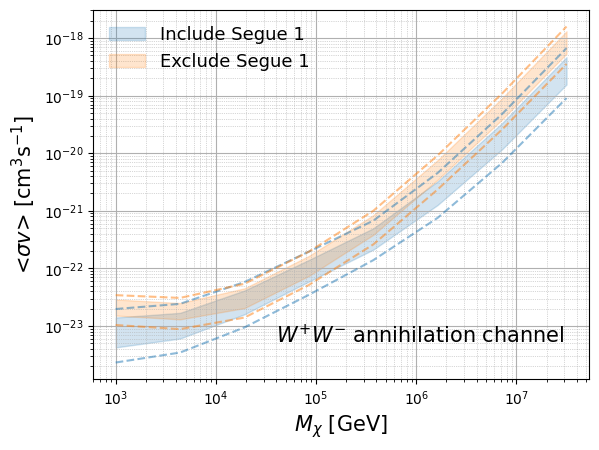

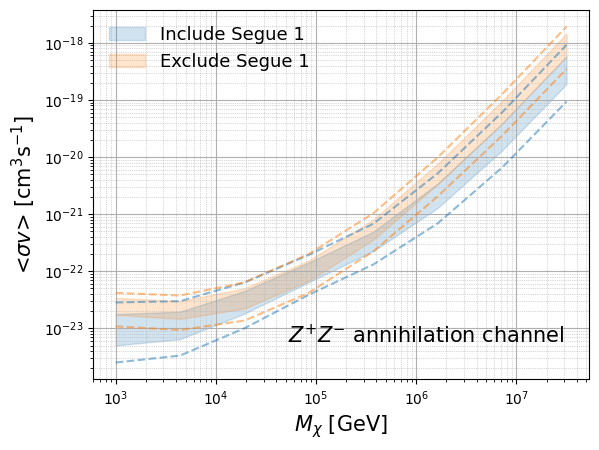

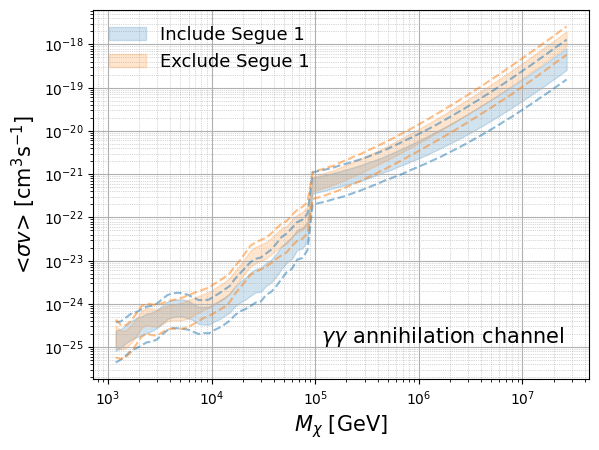

In [53]:
chan = ["ee", "uu", "tt", "ttbar", "bbar", "WW", "ZZ", "gamma"]
chan_lab = [r"$e^{+}e^{-}$", r"$\mu^{+}\mu^{-}$", r"$\tau^{+}\tau^{-}$",
            r"$t\bar{t}$", r"$b\bar{b}$",
            r"$W^{+}W^{-}$", r"$Z^{+}Z^{-}$", r"$\gamma\gamma$"]


for c, cl in zip(chan, chan_lab):
    Likelihood.plotExpULcurve(f"VEGAS_stacked_sys_{c}.npy", label="Include Segue 1")
    Likelihood.plotExpULcurve(f"VEGAS_stacked_sys_{c}_three", label="Exclude Segue 1")
    ax = plt.gca()
    plt.text(0.95, 0.1, r"{} annihilation channel".format(cl), fontsize=15, ha="right", transform=ax.transAxes)
    plt.title("")
    plt.legend(loc=2, fontsize=13, frameon=False)
    plt.savefig(f"VEGAS_combined_{c}.pdf")
    
    plt.show(block=False)

(1e-22, 1e-15)

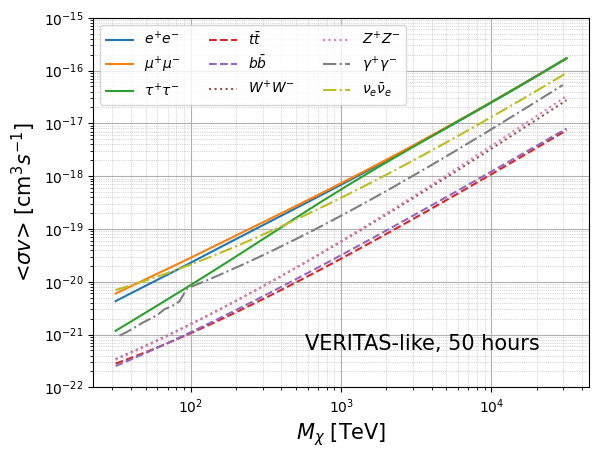

In [64]:

chan = ["ee", "uu", "tt", "ttbar", "bbar", "WW", "ZZ", "gamma", "nue"]
chan_lab = [r"$e^{+}e^{-}$", r"$\mu^{+}\mu^{-}$", r"$\tau^{+}\tau^{-}$", 
            r"$t\bar{t}$", r"$b\bar{b}$",
            r"$W^{+}W^{-}$", r"$Z^{+}Z^{-}$", r"$\gamma^{+}\gamma^{-}$", r"$\nu_e \bar{\nu}_e$"]

ls = ["-", "-", "-", "--", "--", ":",":", "-.", "-."]

sigma = np.logspace(-22, -10, 30)

M = np.logspace(4.5, 7.5, 30)

for c, cl, l in zip(chan, chan_lab, ls):
    data = np.load(f"vts_like_{c}_disc.npy")
    plt.plot(data[:,0], data[:,1],  label=cl, ls=l)
plt.xscale("log")
plt.yscale("log")
plt.ylim(1e-22, 1e-16)
plt.grid()

plt.legend(ncol=3)
plt.xlabel(r"$M_{\chi}$ [TeV]", fontsize=15)
plt.ylabel(r"<$\sigma v$> [cm$^{3}s^{-1}$]", fontsize=15)
ax = plt.gca()
plt.text(0.9, 0.1, "VERITAS-like, 50 hours", fontsize=15, ha="right", transform=ax.transAxes)
ax.grid(b=True, which="major")
ax.grid(b=True, which="minor", ls=":", lw=0.5)
ax.set_ylim(1e-22, 1e-15)    


(1e-26, 2e-15)

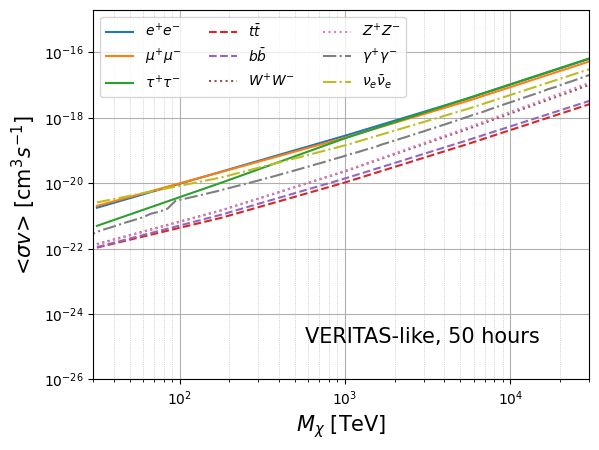

In [76]:

chan = ["ee", "uu", "tt", "ttbar", "bbar", "WW", "ZZ", "gamma", "nue"]
chan_lab = [r"$e^{+}e^{-}$", r"$\mu^{+}\mu^{-}$", r"$\tau^{+}\tau^{-}$", 
            r"$t\bar{t}$", r"$b\bar{b}$",
            r"$W^{+}W^{-}$", r"$Z^{+}Z^{-}$", r"$\gamma^{+}\gamma^{-}$", r"$\nu_e \bar{\nu}_e$"]

ls = ["-", "-", "-", "--", "--", ":",":", "-.", "-."]

sigma = np.logspace(-22, -10, 30)

M = np.logspace(4.5, 7.5, 30)

for c, cl, l in zip(chan, chan_lab, ls):
    data = np.load(f"vts_like_{c}_plot.npy")
    plt.plot(data[:,0], data[:,1],  label=cl, ls=l)
plt.xscale("log")
plt.yscale("log")
plt.xlim(30, 3e4)

plt.legend(ncol=3)
plt.xlabel(r"$M_{\chi}$ [TeV]", fontsize=15)
plt.ylabel(r"<$\sigma v$> [cm$^{3}s^{-1}$]", fontsize=15)
ax = plt.gca()
plt.text(0.9, 0.1, "VERITAS-like, 50 hours", fontsize=15, ha="right", transform=ax.transAxes)
ax.grid(b=True, which="major")
ax.grid(b=True, which="minor", ls=":", lw=0.5)
plt.ylim(1e-26, 2e-15)

In [94]:
etc.get_cmap()

(1e-26, 2e-15)

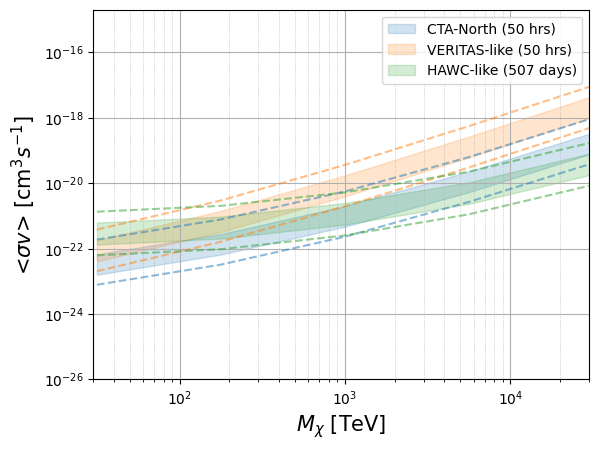

In [99]:
data = np.load("./CTA_like_ttbar_jsys_plot.npy")
etc = plt.plot(data[:,0], data[:,4], alpha=0.5, ls="--")
plt.plot(data[:,0], data[:,5], alpha=0.5, ls="--", color=etc[0].get_color())
etc = plt.fill_between(data[:,0], data[:,2], data[:,3], alpha=0.2, label="CTA-North (50 hrs)", color=etc[0].get_color())

data = np.load("./vts_like_ttbar_jsys_plot.npy")
etc = plt.plot(data[:,0], data[:,4], alpha=0.5, ls="--")
plt.plot(data[:,0], data[:,5], alpha=0.5, ls="--", color=etc[0].get_color())
plt.fill_between(data[:,0], data[:,2], data[:,3], alpha=0.2, label="VERITAS-like (50 hrs)", color=etc[0].get_color())

data = np.load("./hawc_like_ttbar_jsys_plot.npy")
etc = plt.plot(data[:,0], data[:,4], alpha=0.5, ls="--")
plt.plot(data[:,0], data[:,5], alpha=0.5, ls="--", color=etc[0].get_color())
plt.fill_between(data[:,0], data[:,2], data[:,3], alpha=0.2, label="HAWC-like (507 days)", color=etc[0].get_color())

plt.xscale("log")
plt.yscale("log")
plt.xlim(30, 3e4)

plt.legend()
plt.xlabel(r"$M_{\chi}$ [TeV]", fontsize=15)
plt.ylabel(r"<$\sigma v$> [cm$^{3}s^{-1}$]", fontsize=15)
ax = plt.gca()
ax.grid(b=True, which="major")
ax.grid(b=True, which="minor", ls=":", lw=0.5)
plt.ylim(1e-26, 2e-15)

(1e-26, 2e-15)

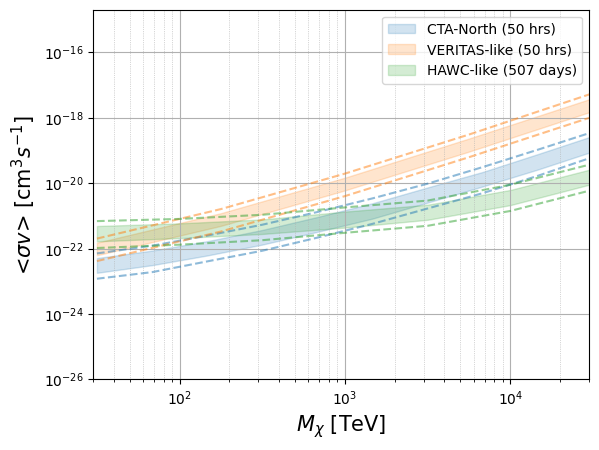

In [100]:
data = np.load("./CTA_like_ttbar_sys_plot.npy")
etc = plt.plot(data[:,0], data[:,4], alpha=0.5, ls="--")
plt.plot(data[:,0], data[:,5], alpha=0.5, ls="--", color=etc[0].get_color())
etc = plt.fill_between(data[:,0], data[:,2], data[:,3], alpha=0.2, label="CTA-North (50 hrs)", color=etc[0].get_color())

data = np.load("./vts_like_ttbar_sys_plot.npy")
etc = plt.plot(data[:,0], data[:,4], alpha=0.5, ls="--")
plt.plot(data[:,0], data[:,5], alpha=0.5, ls="--", color=etc[0].get_color())
plt.fill_between(data[:,0], data[:,2], data[:,3], alpha=0.2, label="VERITAS-like (50 hrs)", color=etc[0].get_color())

data = np.load("./hawc_like_ttbar_sys_plot.npy")
etc = plt.plot(data[:,0], data[:,4], alpha=0.5, ls="--")
plt.plot(data[:,0], data[:,5], alpha=0.5, ls="--", color=etc[0].get_color())
plt.fill_between(data[:,0], data[:,2], data[:,3], alpha=0.2, label="HAWC-like (507 days)", color=etc[0].get_color())

plt.xscale("log")
plt.yscale("log")
plt.xlim(30, 3e4)

plt.legend()
plt.xlabel(r"$M_{\chi}$ [TeV]", fontsize=15)
plt.ylabel(r"<$\sigma v$> [cm$^{3}s^{-1}$]", fontsize=15)
ax = plt.gca()
ax.grid(b=True, which="major")
ax.grid(b=True, which="minor", ls=":", lw=0.5)
plt.ylim(1e-26, 2e-15)

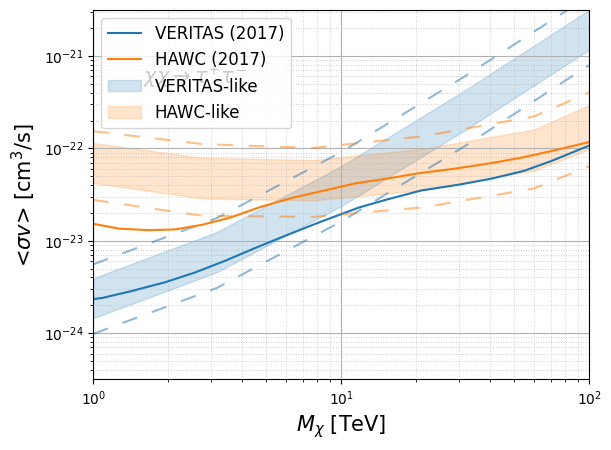

In [104]:
Likelihood.plotULcurve("VERITAS", ls="-", units="TeV", label="VERITAS (2017)")
Likelihood.plotExpULcurve(filename="sanity_check_vts", label="VERITAS-like", c=const.colors[0], units="TeV")
Likelihood.plotULcurve("HAWC", ls="-", units="TeV", label="HAWC (2017)")
Likelihood.plotExpULcurve(filename="sanity_check_hawk_second", label="HAWC-like", c=const.colors[1], units="TeV")
plt.xlim(1, 1e2)
plt.legend(fontsize=12)
plt.title("")
ax = plt.gca()
plt.text(0.1, 0.8, r"$\chi\chi \rightarrow \tau^{+}\tau^{-}$", fontsize=15, ha="left", transform=ax.transAxes)
plt.savefig("sanity_check_tt.pdf")


Text(0.1, 0.8, '$\\chi\\chi \\rightarrow \\tau^{+}\\tau^{-}$')

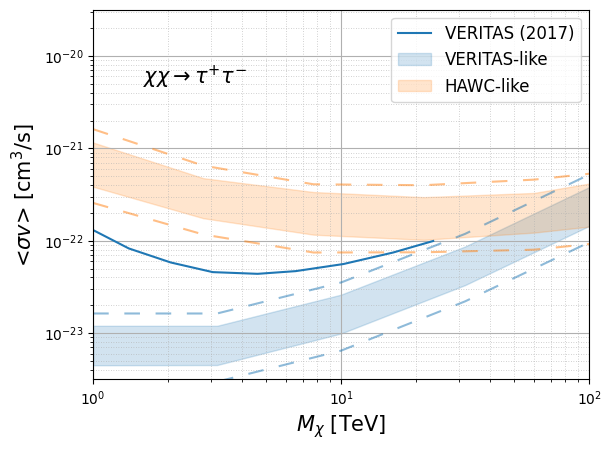

In [109]:
Likelihood.plotULcurve("VEGAS_segue_1_48h_bbar", ls="-", units="TeV", label="VERITAS (2017)")
Likelihood.plotExpULcurve(filename="sanity_check_vts_bbar", label="VERITAS-like", c=const.colors[0], units="TeV")
#Likelihood.plotULcurve("HAWC_bbar", ls="-", units="TeV", label="HAWC (2017)")
Likelihood.plotExpULcurve(filename="sanity_check_hawk_bbar_second", label="HAWC-like", c=const.colors[1], units="TeV")
plt.xlim(1, 1e2)
plt.legend(fontsize=12)
plt.title("")
ax = plt.gca()
plt.text(0.1, 0.8, r"$\chi\chi \rightarrow \tau^{+}\tau^{-}$", fontsize=15, ha="left", transform=ax.transAxes)


In [ ]:
Likelihood.plotULcurve("VERITAS", ls="-", units="TeV", label="VERITAS (2017)")
Likelihood.plotExpULcurve(filename="sanity_check_vts", label="VERITAS-like", c=const.colors[0], units="TeV")
Likelihood.plotULcurve("HAWC", ls="-", units="TeV", label="HAWC (2017)")
Likelihood.plotExpULcurve(filename="sanity_check_hawk_second", label="HAWC-like", c=const.colors[1], units="TeV")
plt.xlim(1, 1e2)
plt.legend(fontsize=12)
plt.title("")
ax = plt.gca()
plt.text(0.1, 0.8, r"$\chi\chi \rightarrow \tau^{+}\tau^{-}$", fontsize=15, ha="left", transform=ax.transAxes)
plt.savefig("sanity_check_tt.pdf")
